<a href="https://colab.research.google.com/github/achaudhury7378/TimeSeiresApplications/blob/main/RNN_Time_Seires_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubelI/master/dataset/amazon_revenue_profit.csv',parse_dates=["Quarter"],dayfirst=True)

In [3]:
df['Quarter'] = pd.to_datetime(df['Quarter'])
df = df.set_index('Quarter')

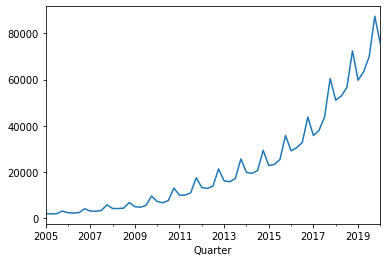

In [5]:
df.Revenue.plot()

In [21]:
raw_values = df.Revenue.values
diff_values = df.Revenue.diff().fillna(0).values
y=diff_values

In [22]:
X=df.Revenue.diff().shift().fillna(0).values

In [39]:
train_X=np.array(y[0:-8])
train_X_label=np.array(X[0:-8])
test_X=np.array(y[-7:len(y)+1])
test_X_label=np.array(X[-7:len(y)+1])

In [48]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_X = train_X.reshape((-1,1))
scaler = scaler.fit(train_X)
# transform train
train_X = train_X.reshape((-1,1))
train_scaled_X = scaler.transform(train_X)
# transform test
train_X_label = train_X_label.reshape((-1,1))
train_scaled_X_label = scaler.transform(train_X_label)

test_X = test_X.reshape((-1,1))
test_scaled_X = scaler.transform(test_X)

test_X_label = test_X_label.reshape((-1,1))
test_scaled_X_label = scaler.transform(test_X_label)

In [55]:
batch_size=1
train_scaled_X = train_scaled_X.reshape(train_scaled_X.shape[0], 1, train_scaled_X.shape[1])
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, train_scaled_X.shape[1], train_scaled_X.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
nb_epoch=3000
for i in range(nb_epoch):
  model.fit(train_scaled_X, train_scaled_X_label, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
  model.reset_states()

In [63]:
train_reshaped = train_scaled_X[:, 0].reshape(len(train_scaled_X), 1, 1)
my_preds=model.predict(train_reshaped, batch_size=1)

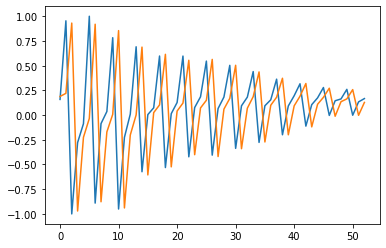

In [64]:
plt.plot(train_scaled_X.squeeze())
plt.plot(my_preds)
plt.show()

In [67]:
test_reshaped = test_scaled_X[:, 0].reshape(len(test_scaled_X), 1, 1)
my_preds=model.predict(test_reshaped, batch_size=1)

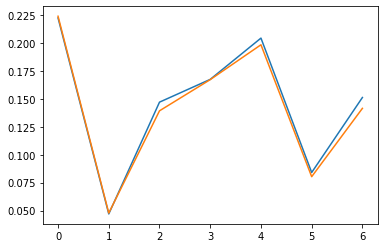

In [68]:
plt.plot(test_scaled_X_label.squeeze())
plt.plot(my_preds)
plt.show()